In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras import callbacks

In [3]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [4]:
maxlen = 500
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [5]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    SimpleRNN(32, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\jaina\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [8]:
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

In [9]:
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_split=0.2)

Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.6011 - loss: 0.6474 - val_accuracy: 0.7754 - val_loss: 0.4857
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.8047 - loss: 0.4490 - val_accuracy: 0.8246 - val_loss: 0.4107
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.8801 - loss: 0.3044 - val_accuracy: 0.8268 - val_loss: 0.4072
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.9330 - loss: 0.1913 - val_accuracy: 0.8402 - val_loss: 0.4411
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.9638 - loss: 0.1135 - val_accuracy: 0.7848 - val_loss: 0.5898
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.9704 - loss: 0.0873 - val_accuracy: 0.8308 - val_loss: 0.5643
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.9915 - loss: 0.0319 - val_accuracy: 0.8272 - val_loss: 0.6835
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.9934 - loss: 0.0244 - 

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7020 - loss: 1.6168
Test Accuracy: 0.7020


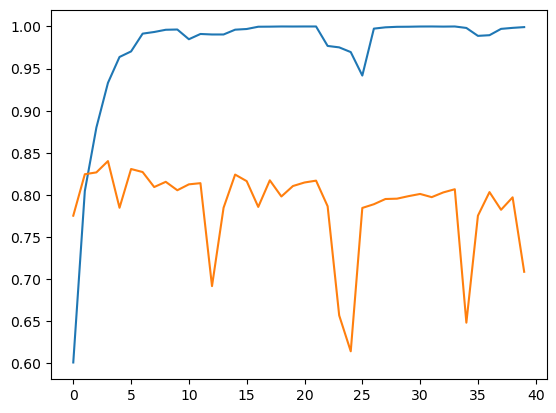

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()